In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense,Flatten,Reshape,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() # MNIST를 읽고 신경망에 입력할 준비
x_train=x_train.astype('float32')/255.
x_test=x_test.astype('float32')/255.
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
zdim=32					# 잠복 공간의 차원

encoder_input=Input(shape=(28,28,1))	# 인코더
x=Conv2D(32,(3,3),activation='relu',padding='same',strides=(1,1))(encoder_input)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2D(64,(3,3),activation='relu',padding='same',strides=(1,1))(x)
x=Flatten()(x)
encoder_output=Dense(zdim)(x)
model_encoder=Model(encoder_input,encoder_output)

decoder_input=Input(shape=(zdim,))	# 디코더
x=Dense(3136)(decoder_input)
x=Reshape((7,7,64))(x)
x=Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=(1,1))(x)
x=Conv2DTranspose(64,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2DTranspose(32,(3,3),activation='relu',padding='same',strides=(2,2))(x)
x=Conv2DTranspose(1,(3,3),activation='relu',padding='same',strides=(1,1))(x)
decoder_output=x
model_decoder=Model(decoder_input,decoder_output)

model_input=encoder_input # 인코더와 디코더를 결합하여 오토인코더 모델 구축
model_output=model_decoder(encoder_output)
model=Model(model_input,model_output)

model.compile(optimizer='Adam',loss='mse')	# 오토인코더 학습
model.fit(x_train,x_train,epochs=50,batch_size=128,shuffle=True,validation_data=(x_test,x_test))

i=np.random.randint(x_test.shape[0])	# 테스트 집합에서 임의로 두 샘플 선택
j=np.random.randint(x_test.shape[0])
x=np.array((x_test[i],x_test[j]))
z=model_encoder.predict(x)

zz=np.zeros((11,zdim))			# 두 샘플 사이에서 등간격 점을 만듬
alpha=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
for i in range(11):
    zz[i]=(1.0-alpha[i])*z[0]+alpha[i]*z[1]

gen=model_decoder.predict(zz)		# 등간격 점에서 가짜 샘플 생성

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - loss: 0.0459 - val_loss: 0.0069
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0064 - val_loss: 0.0050
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0039 - val_loss: 0.0037
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0034 - val_loss: 0.0034
Epoch 9/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 10/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 11/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 12/50
469/469 ━━━━━━━━━━━━━━━━━━━

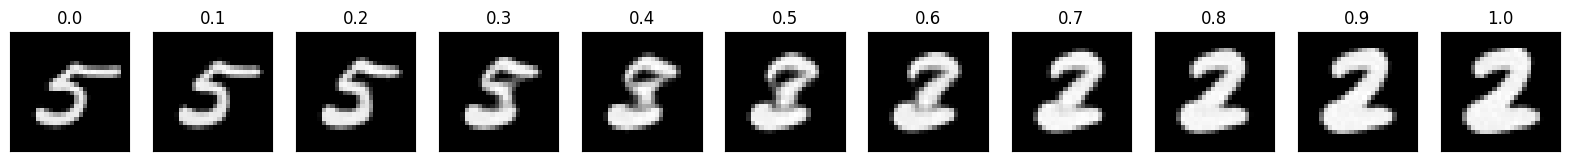

In [4]:
plt.figure(figsize=(20,4))
for i in range(11):
    plt.subplot(1,11,i+1)
    plt.imshow(gen[i].reshape(28,28),cmap='gray'); plt.xticks([]); plt.yticks([])
    plt.title(str(alpha[i]))